# Basic usage of `DEMAP`

In this notebook, we will see how to install and use `DEMAP` to extract river
network from DEM.

## Install `DEMAP`

Download the source code from Github and install it using `pip` locally:

```Shell
git clone https://github.com/laijingtao/demap.git
pip install ./demap
```

In [1]:
import demap

## Process DEM
`demap.process_dem()` provides an "all-in-one" method to process the DEM file.

It fills the local depressions in DEM, calculate flow direction and drainage
area, and generate a stream network.

In [2]:
demfile = 'olympics_500m_dem.tif'
res = demap.process_dem(demfile, drainage_area_threshold=1e5, base_level=0.5)

Filling depressions ...
RichDEM fill depression output:
Calculating flow direction ...
RichDEM flow direction output:
Building receiver grid ...



A Priority-Flood (Zhou2016 version)
C Zhou, G., Sun, Z., Fu, S., 2016. An efficient variant of the Priority-Flood algorithm for filling depressions in raster digital elevation models. Computers & Geosciences 90, Part A, 87 – 96. doi:http://dx.doi.org/10.1016/j.cageo.2016.02.021

t Zhou2016 wall-time = 0.0136527 s

A Barnes (2014) Flat Resolution Flat Mask Generation
C Barnes, R., Lehman, C., Mulla, D., 2014a. An efficient assignment of drainage direction over flat surfaces in raster digital elevation models. Computers & Geosciences 62, 128–135. doi:10.1016/j.cageo.2013.01.009

t Succeeded in = 0.00158837 s
p Setting up labels matrix...
p Setting up flat resolution mask...
p Searching for flats...
t Succeeded in = 0.00214171 s================ ] (99% - 0.0s - 1 threads)
m Cells with no flow direction = 6315
m Low edge cells               = 2066
m High edge cells              = 5947
p Labeling flats...
m Unique flats = 1678
p Removing flats without outlets from the queue...
  The flat he

Building ordered array ...
Accumulating flow ...
Building stream network ...


`demap.process_dem()` returns a python dictionary that contains the DEM data, 
stream network data, and some other relative information.

What is useful for us is the DEM and stream network.

In [3]:
dem = res['dem']
stream_network = res['stream_network']

We can save the stream network in shapefile to view it in GIS software:

In [4]:
demap.network_to_shp(stream_network, 'demap_stream_network')

Converting stream network to streams ...


# Extract a stream (or river, channel, valley, etc.)
Given a channel head, we can extract a stream from the stream network:

In [5]:
head_x, head_y = 454435, 5292993
example_stream = stream_network.extract_from_xy(head_x, head_y, direction='down')

Extracting stream network ...


and then plot its longitudinal profile:

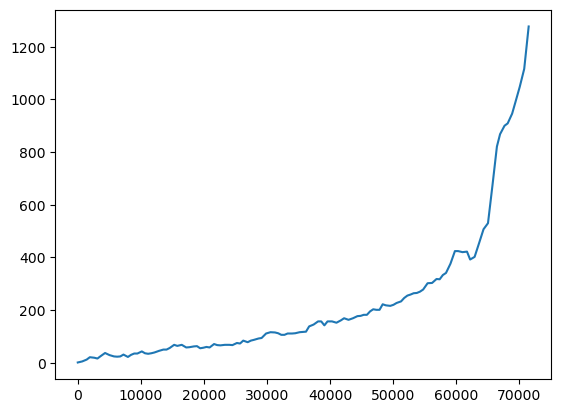

In [6]:
import matplotlib.pyplot as plt
plt.plot(example_stream.dataset['distance_upstream'], example_stream.get_value(dem))

A stream (or river, channel, valley, etc.) is stored as a `demap.Stream` object.
`Stream.dataset` is a `xarray.Dataset` that contains the data associated with
the stream. For example, we use `distance_upstream` in the above code.

In addition, `demap.Stream` provides a group of useful methods. We use
`Stream.get_value()` to extract the elevation along the stream from the DEM
data.

## Extract the stream network in a catchment

Given an outlet, we can call `extract_from_xy(direction='up')` to extract
streams upstream, i.e., the stream network in a catchment.

In [7]:
outlet_x, outlet_y = 403689, 5266903
example_network = stream_network.extract_from_xy(outlet_x, outlet_y, direction='up')

Extracting stream network ...


Convert this network into a list of streams:

In [8]:
example_stream_list = example_network.to_streams()

Converting stream network to streams ...


and then plot the longitudinal profiles of all streams:

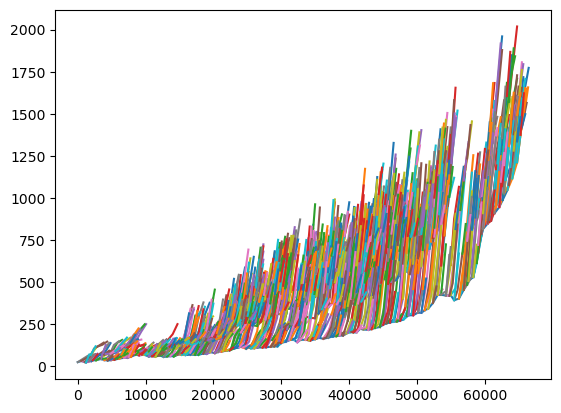

In [9]:
for s in example_stream_list:
    plt.plot(s.dataset['distance_upstream'], s.get_value(dem))